#  Spectrum of the Lyman-n forest.

Data: The input data are files each representing a skewer through a 25Mpc co-moving simulation box.

I am going to add the Lyman-n series to each skewer then, eventually, add $\sim 50$ skewers together to get a simulated quasar spectrum. 


In [1]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import matplotlib as mpl
from glob import glob
import numpy as np
import astropy.constants as const
import astropy.units as u
plt.rc('font', family='serif', size=15)

# path to the data, for both computers its in ~/Data:
path = '/Users/mwilde/Data/'

#use the pretty LaTeX fonts
mpl.rcParams.update({'text.usetex': True})

#### define constants:

In [2]:
# c = const.c.cgs.value # speed of light in cm/s
c = const.c.to(u.km / u.s).value # km/s
R_h = const.Ryd.to(1 / u.Angstrom).value # Rydberg constant in 1 /angstroms

#### Flux: 
$F = e^{-\tau}$ 

In [3]:
def flux(t):
    """A function to convert tau to flux using the relation
    
    I = I(0)exp(-tau)
    
    or if S_v = 1
    
    I = I(0)exp(-tau) + (1 - exp(-tau))
    with I(0) = 0.
    
    """
    return np.exp(-t)

#### Oscillator strength or $g-f$ value for the Lyman series: 
$gf_{1n} = \frac{2^9 n^5(n-1)^{2n-4}}{3(n+1)^{2n+4}}$

In [4]:
def gf_1n(nn):
    """ A function to calculate the oscillator strengths of of the Lyman series (n'=1).
        
        Reference: RL equation 10.46 (p.281)
    """
    if nn == 1:
        gf = 1.0
    elif nn == 0:
        gf = 1.0
    else:
        gf = (2**9 * nn**5 * (nn-1)**(2*nn-4)) / (3*(nn+1)**(2*nn+4))
    return gf

#### Convert velocity, $v$ into observed wavelength:
$\lambda_{obs}(1+z) = \lambda_0(1 - \frac{v}{c})$


In [5]:
def lam_obs(vv,lam_0):
    """This function takes as input the velocity in km/s and the emitted wavelength 
    as well as the redshift.
    
    returns the wavelength in the observers frame angstroms."""
    return lam_0*(1 - vv/c) # vv from km/s, c in km/s

#### Open the first few files:

Format of the data

velocity [km/s], tau_HILya, tau_HeI584, tau_HeIILya, nHI [cm^-3], nHeII [cm^-3], Delta_b, T [K], xpos [Mpc/h], vpec [km/sec]

In [6]:
! head /Users/mwilde/Data/sim_data/z2.45/spec_xHeII1_015_mt_line0000.dat

#Redshift = 2.45e+00 Box = 2.50e+04 [kpc/h] VelScale = 2.53e+03 [km/s]
#x = 3.01e-01 y = 7.85e-01
#velocity [km/s], tau_HILya, tau_HeI584, tau_HeIILya, nHI [cm^-3], nHeII [cm^-3], Delta_b, T [K], xpos [Mpc/h], vpec [km/sec]
0.000e+00 1.086e-01 2.934e-03 2.724e+00 8.680e-12 8.680e-10 2.980e+00 1.721e+04 7.558e+03 -8.706e+01
8.441e-01 1.120e-01 3.089e-03 2.868e+00 8.913e-12 8.913e-10 3.001e+00 1.721e+04 7.567e+03 -8.703e+01
1.688e+00 1.155e-01 3.236e-03 3.005e+00 9.094e-12 9.094e-10 3.004e+00 1.721e+04 7.575e+03 -8.682e+01
2.532e+00 1.189e-01 3.373e-03 3.131e+00 9.271e-12 9.271e-10 3.005e+00 1.719e+04 7.583e+03 -8.639e+01
3.377e+00 1.224e-01 3.496e-03 3.246e+00 9.583e-12 9.583e-10 3.057e+00 1.716e+04 7.592e+03 -8.582e+01
4.221e+00 1.258e-01 3.606e-03 3.348e+00 1.000e-11 1.000e-09 3.157e+00 1.711e+04 7.600e+03 -8.524e+01
5.065e+00 1.292e-01 3.700e-03 3.436e+00 1.038e-11 1.038e-09 3.262e+00 1.705e+04 7.608e+03 -8.476e+01


In [7]:
infile = path+'sim_data/z2.45/spec_xHeII1_015_mt_line0000.dat'
v, tau_HILya, tau_HeI584, tau_HeIILya, nHI, nHeII, Delta_b, T, xpos, vpec = np.loadtxt(infile,unpack=True)

#### What does the data look like?

-10.2701449547


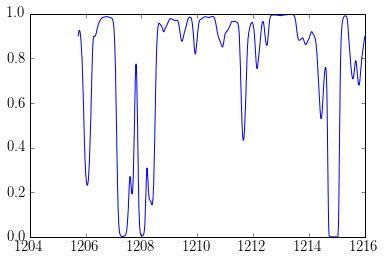

In [8]:
# plt.plot(v,tau_HILya)
plt.plot(lam_obs(v,1216), flux(tau_HILya))

print lam_obs(v,1216).min() - lam_obs(v,1216).max()

#### Add the Lyman series lines for first skewer.

$\tau_{1n} \rightarrow \frac{f_n}{f_{Ly\alpha}} \tau$ and $f_{Ly\alpha} = gf_{12}$ where $gf_{12}$ is the oscillator strength for the $n = 1$ to $n = 2$ transition. 

take the $\tau_{Ly\alpha}$ from the file and make a new array with added levels:

In [9]:
f_Lya = gf_1n(2) # define a variable for Lyman alpha oscillator strength
f_1n = np.array([gf_1n(n)/f_Lya for n in range(2,1000)]) # make an array of the oscillator strengths and convert to opacity

#### Get emitted wavelengths:


$ \frac{1}{\lambda} = Ry(1-\frac{1}{n^2})$

In [10]:
def lyman_lambda(nmax):
    return (R_h*(1 - (1/nmax**2)))**-1

#### Make a plot of the Lyman-n series for one skewer. 

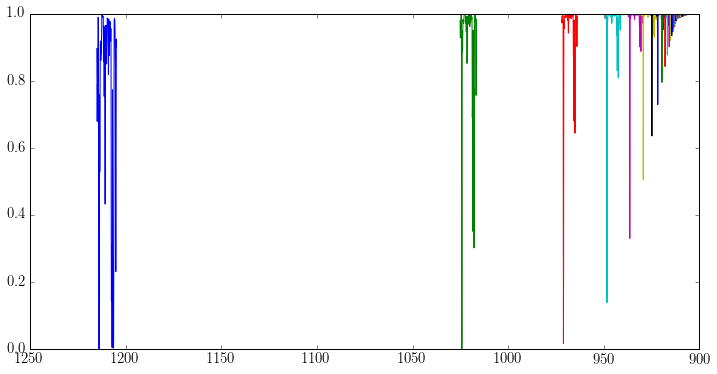

In [11]:
plt.figure(figsize=(12,6))
plt.gca().invert_xaxis()

for i in range(2,100):
    plt.plot(lam_obs(v,lyman_lambda(i)), flux(tau_HILya*f_1n[i-2]))

$\lambda_{obs}(1+z) = \lambda_0(1 + \frac{v_1+v_2+...+v_n}{c})$

# Make an average forest for 2000 different forests of length = 50

### Each box is then 1.25 Gpc/h

In [12]:
box_size = 2.50e+04*u.kpc # [kpc/h]
num_boxes = 50
print (box_size*num_boxes).to(u.Gpc)

1.25 Gpc


Read in each file and make an list of the $\tau_{HILy\alpha}$ arrays from each file:

In [13]:
#step size to bin the tau files to run faster
step = 10


In [46]:
! head ../../../Data/sim_data/z2.45/spec_xHeII1_015_mt_line0000.dat

#Redshift = 2.45e+00 Box = 2.50e+04 [kpc/h] VelScale = 2.53e+03 [km/s]
#x = 3.01e-01 y = 7.85e-01
#velocity [km/s], tau_HILya, tau_HeI584, tau_HeIILya, nHI [cm^-3], nHeII [cm^-3], Delta_b, T [K], xpos [Mpc/h], vpec [km/sec]
0.000e+00 1.086e-01 2.934e-03 2.724e+00 8.680e-12 8.680e-10 2.980e+00 1.721e+04 7.558e+03 -8.706e+01
8.441e-01 1.120e-01 3.089e-03 2.868e+00 8.913e-12 8.913e-10 3.001e+00 1.721e+04 7.567e+03 -8.703e+01
1.688e+00 1.155e-01 3.236e-03 3.005e+00 9.094e-12 9.094e-10 3.004e+00 1.721e+04 7.575e+03 -8.682e+01
2.532e+00 1.189e-01 3.373e-03 3.131e+00 9.271e-12 9.271e-10 3.005e+00 1.719e+04 7.583e+03 -8.639e+01
3.377e+00 1.224e-01 3.496e-03 3.246e+00 9.583e-12 9.583e-10 3.057e+00 1.716e+04 7.592e+03 -8.582e+01
4.221e+00 1.258e-01 3.606e-03 3.348e+00 1.000e-11 1.000e-09 3.157e+00 1.711e+04 7.600e+03 -8.524e+01
5.065e+00 1.292e-01 3.700e-03 3.436e+00 1.038e-11 1.038e-09 3.262e+00 1.705e+04 7.608e+03 -8.476e+01


In [101]:
t_list = []
nHI = []
file_list = glob(path+'sim_data/z2.45/spec_xHeII1_015_mt_line*.dat')
for i,f in enumerate(file_list[::step]):
    v,t,c1,c2,n,c4,c5,c6,c7,c8 = np.loadtxt(f, unpack=True)
    t_list.append(t)
    nHI.append(n)
diffv = v[1] - v[0]

This bit is a bit more complicated. I produce a list of arrays of opacities with differing numbers of lyman lines.

I have tried to vectorize with N_n being an array but it seems to fail.
    
    tau_n[N_n:] +=  tau_flat[:len(tau_n[N_n:])]*f_1n[i]



Initialize all the arrays to loop:

In [113]:
# make a velocity array with the correspoding length and delta v
v_flat = np.arange(v.size*num_boxes)*diffv

# determine the wavelength of Lyman alpha line:
lambda_alpha = lyman_lambda(2)

# make the lists into numpy arrays
t_list = np.array(t_list)
nHI = np.array(nHI)

# find the wavelength where the line starts in v
n = np.arange(2,len(f_1n)+2)
lambda_n = lyman_lambda(n)

#determine the delta v between the Lyman-a and Lyman-n lines:
delta_v_an = c*np.log(lambda_alpha/lambda_n) # km/s

# determine what index the nth line should appear in the v_flat array
N_n = np.zeros_like(delta_v_an, dtype=np.int32)
for i,dv in enumerate(delta_v_an):
    N_n[i] = np.where(abs(v_flat - dv)/diffv < 0.5)[0][0]

In [17]:
diff_line_list = []
num_lines_array = [50]
num_spectra = len(file_list)
for num_lines in num_lines_array:
    tau_final = []
    for i in range(num_spectra):

        # choose 50 random boxes from the 2000 different boxes
        randos = np.random.randint(len(file_list[::step]), size=num_boxes)
        t_sublist = t_list[randos,:]

        # flatten the array of opacity
        tau_flat = np.array(t_sublist).flatten()
        
        # choose 50 random boxes from the 2000/step different boxes
        n_sublist = nHI[randos,:]

        # flatten the array of density
        nHI_flat = np.array(n_sublist).flatten()

        # make a deep copy of the flattened opacity array so it doesnt get changed below
        # when we +=
        #tau_n = tau_flat.copy()
        tau_n = np.zeros_like(tau_flat)

        # loop through the lyman series
        for i,n in enumerate(N_n):
            # sum the opacites at the point in the velocity array where they occur
            # f_1n[1] = Lyman beta line
            tau_n[n:] +=  tau_flat[:len(tau_n[n:])]*f_1n[i]

        tau_final.append(tau_n)
    tau_final = np.array(tau_final)
    tau_final = tau_final.sum(0)
    diff_line_list.append(tau_final/num_spectra)

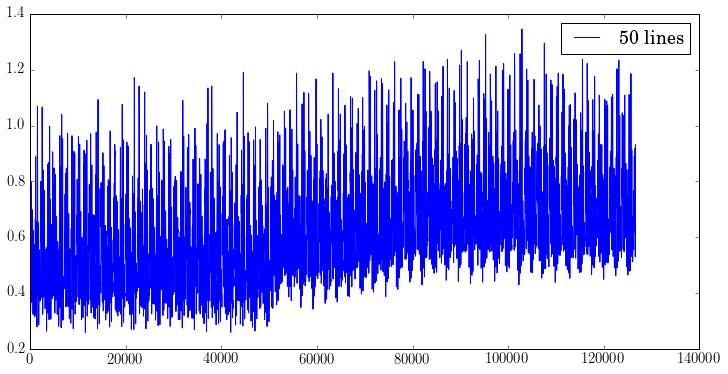

In [18]:
fig, ax = plt.subplots(figsize=(12,6))

for num,d in enumerate(diff_line_list):
    ax.plot(v_flat, d, label='{} lines'.format(num_lines_array[num]))
ax.legend()
plt.show()

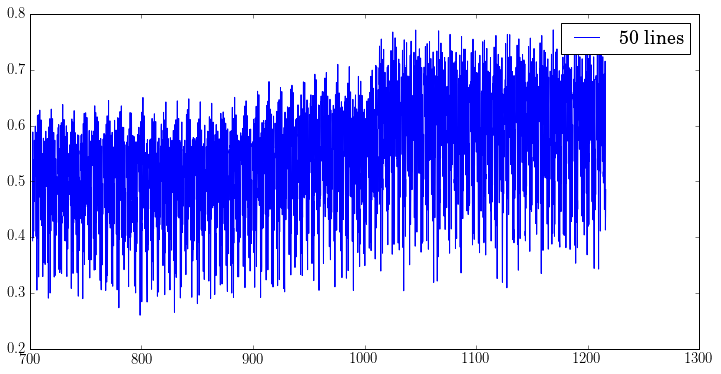

In [19]:
fig, ax = plt.subplots(figsize=(12,6))

for num,d in enumerate(diff_line_list):
    ax.plot(lam_obs(v_flat,1216), flux(d), label='{} lines'.format(num_lines_array[num]))
ax.legend()
plt.show()

ax.set_xlim(912,1216)
ax.set_xlabel(r'$\lambda(1+z)$ $[\AA]$')
ax.set_ylabel(r'$e^{-\tau}$')
ax.legend()

plt.show()

resolution $= R = lambda/deltalambda =c/deltav  deltav(accross the cell) = c/R$


$$R = c / \Delta v = \lambda / \Delta \lambda   = 149089.2$$

$$\sigma = (R_{sdss}/R)*\delta v$$

In [20]:
R = c/np.diff(v_flat)[0]
print "R = ",R

R =  355162.253288


In [21]:
from astropy.convolution import Gaussian1DKernel, convolve

In [22]:
def plot_spec(x,y):
    ax.plot(lam_obs(x,1216),flux(y), alpha=0.5)
    ax.set_xlim(912,1216)
    ax.set_xlabel(r'$\lambda(1+z)$ $[\AA]$')
    ax.set_ylabel(r'$e^{-\tau}$')

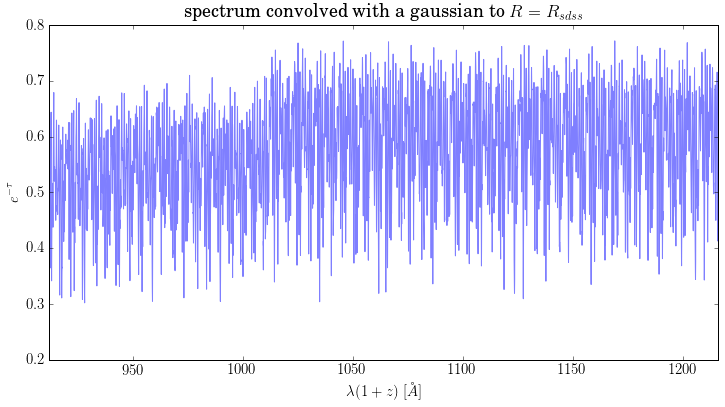

In [23]:
# Create kernel
dv_cell = 10.2679380093

R_sdss = 2000. # sdss resolution

#compute the stdev for the gaussian smoothing
sigma = (R_sdss/R)*diffv

g = Gaussian1DKernel(stddev=sigma)

x = v_flat

# Convolve data
z = convolve(diff_line_list[0], g , boundary='extend', normalize_kernel=True)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(lam_obs(x,1216), flux(z), alpha=0.5)

ax.set_xlim(912,1216)
ax.set_xlabel(r'$\lambda(1+z)$ $[\AA]$')
ax.set_ylabel(r'$e^{-\tau}$')
ax.set_title(r'spectrum convolved with a gaussian to $R = R_{sdss}$')
# plt.xlim(912,1216)
plt.show()

Need to add the average step increase.

$ \langle F_n \rangle = \langle e^{-\tau_{\nu}} \rangle $ 

$ \tau^{n}_{eff} = - log \langle F_n \rangle $

$ \tau^{tot}_{eff} = \Sigma \tau^{n}_{eff} $

Then plot:

$e^{\tau^{tot}_{eff}}$

In [24]:
ave_Fn = []
tn_eff = []
for f in f_1n:
    ave_Fn.append(np.mean(flux(tau_HILya*f)))
    tn_eff.append(-np.log(np.mean(flux(tau_HILya*f))))

In [25]:
print len(tn_eff)
print lambda_n.shape

998
(998,)


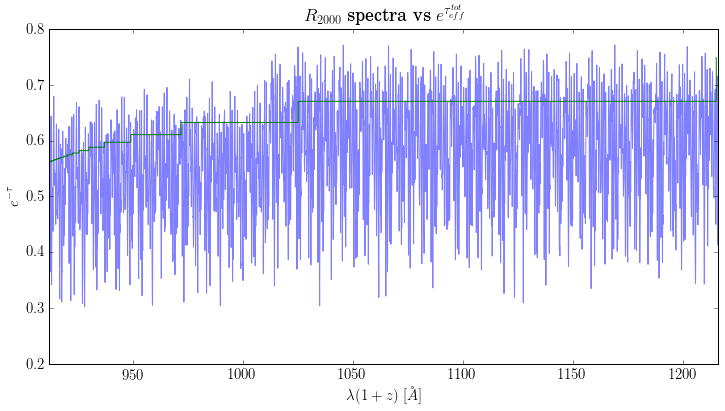

In [26]:
fig, ax = plt.subplots(figsize=(12,6))

plot_spec(x,z)
ax.step(lambda_n, np.exp(-np.cumsum(tn_eff)))
ax.set_title(r'$R_{2000}$ spectra vs $e^{\tau^{tot}_{eff}}$')
plt.show()

## Add continuum opacity


$\tau = \sigma n_H L$ 

where $L$ is the pixel size

$ \Delta \tau_m = \sigma(v_m) n_{HI} L$

In [121]:
def sigma_bf(lambda_obs, lambda_em):
    return 6.35e18*(lambda_obs/lambda_em)**(-3)

In [122]:
sigma_bf(lam_obs(v[1:],1216),1216).size

2999

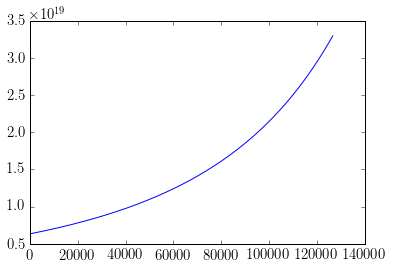

In [123]:
plt.plot(v_flat[1:], sigma_bf(lam_obs(v_flat[1:],912),912))

In [112]:
randos = np.random.randint(len(file_list[::step]), size=num_boxes)
print randos

t_sublist = t_list[randos,:]

# choose 50 random boxes from the 2000/step different boxes
n_sublist = np.array(nHI)[randos,:]

# flatten the array of density
nHI_flat = np.array(n_sublist).flatten()

[109 187  13 177  12  55 198  77  25  21 147 142 146  52 155  61 131   9
 144 181  50  92  98 160  44 106  69 117 170 196  83 123 169 139 157  63
  13  49   0  72  26 158 159  39 102  72 119   1  17   6]


In [97]:
nHI_flat = np.array(nHI).flatten()

In [74]:
sigma_bf_lambda = [sigma_bf(lam_obs(v_flat,n),n) for n in lambda_n]

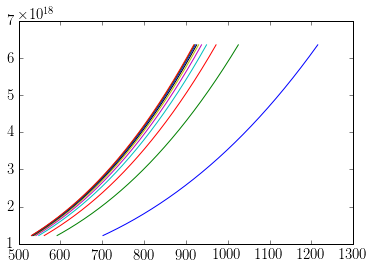

In [124]:
for i in range(10):
    plt.plot(lam_obs(v_flat,lambda_n[i]), sigma_bf_lambda[i])

In [88]:
L = 2.50e+04*u.kpc

In [116]:
h = 0.7

L_physical = (L*h).to(u.cm).value
print L_physical

5.39993576757e+25


In [127]:
delta_tau_m = [sigma_bf(lam_obs(v_flat,n),n)*nHI_flat*L_physical for n in lambda_n[:10]]

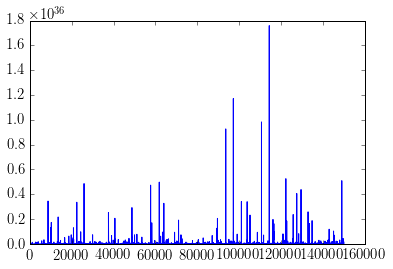

In [128]:
plt.plot(delta_tau_m[0])

In [125]:
np.array(delta_tau_m).shape

(10, 150000)

In [135]:
continuum = np.linspace(700,1216,10000)

In [137]:
redshifted_continuum = [cont*(1 - v_flat/c) for cont in continuum]

In [140]:
plt.plot(continuum, sigma_bf(redshifted_continuum[0], continuum))

ValueError: operands could not be broadcast together with shapes (150000,) (10000,) 